<a href="https://colab.research.google.com/github/akanupam/PyTorch-journey/blob/main/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises


In [185]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Setup random seed
RANDOM_SEED = 42

cuda


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [186]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
n_samples = 1000
X,y = make_moons(
    n_samples= n_samples,
    shuffle=True,
    noise=0.2,
    random_state=RANDOM_SEED
)
print(f"X data: {X[:5]}\ny data: {y[:5]}")

X data: [[-0.11166654  0.52022374]
 [ 1.14264982 -0.34257734]
 [ 0.79555796 -0.01144231]
 [ 0.11182668 -0.55193153]
 [-0.81646618  0.54399604]]
y data: [1 1 1 1 0]


In [187]:
# Turn data into a DataFrame
import pandas as pd
circles = pd.DataFrame({
    "X1": X[:,0],
    "X2":X[:,1],
    "label": y
})
circles.head()

,X1,X2,label
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


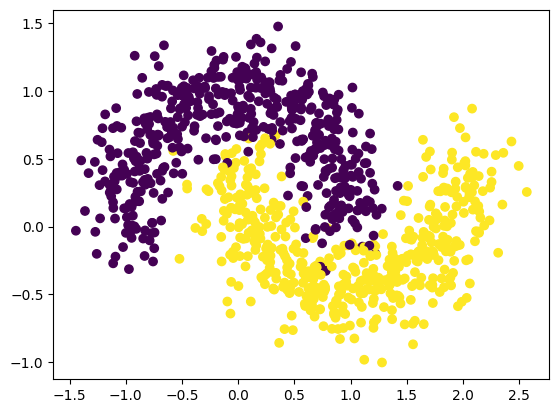

In [188]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(
    x=X[:,0],
    y=X[:,1],
    c=y,
    # cmap=plt.cm.RdYlBu
)

In [189]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(X[:5], y[:5])

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_SEED
)
print("Splitted")
print(X_train[:5], X_test[:5])
print(y_train[:5], y_test[:5])

tensor([[-0.1117,  0.5202],
        [ 1.1426, -0.3426],
        [ 0.7956, -0.0114],
        [ 0.1118, -0.5519],
        [-0.8165,  0.5440]]) tensor([1., 1., 1., 1., 0.])
Splitted
tensor([[ 2.1397,  0.3731],
        [-1.2067,  0.4169],
        [-0.2117,  1.1715],
        [-0.0632,  0.9842],
        [ 0.3938, -0.1620]]) tensor([[ 0.6248, -0.4549],
        [ 1.1254,  0.4677],
        [ 1.3842, -0.3646],
        [ 0.8931,  0.9734],
        [ 1.7039, -0.4324]])
tensor([1., 0., 0., 0., 1.]) tensor([1., 0., 1., 0., 1.])


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [209]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
      super().__init__()
      self.layer1 = nn.Linear(in_features=2, out_features=8)
      self.layer2 = nn.Linear(in_features=8, out_features=8)
      self.layer3 = nn.Linear(in_features= 8, out_features=1)
      self.relu = nn.ReLU()

    def forward(self, x):
        ## Your code here ##
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

# Instantiate the model
## Your code here ##
model_1 = MoonModelV0().to(device)
model_1

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [210]:
untrained_pred = model_1(X_test.to(device))
print(f"Untrained predictions:{untrained_pred[:5]}\nLength:{len(untrained_pred)}")

Untrained predictions:tensor([[-0.0999],
        [-0.2613],
        [-0.2168],
        [-0.2369],
        [-0.2534]], device='cuda:0', grad_fn=<SliceBackward0>)
Length:200


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [211]:
# Setup loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [212]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
## Your code here ##
y_logits = model_1(X_test.to(device))[:5]
print(y_logits, "\n")

# Prediction probabilities
print("Pred probs:")
## Your code here ##
pred_prob = torch.sigmoid(y_logits)
print(pred_prob,"\n")

# Prediction labels
print("Pred labels:")
## Your code here ##
pred_labels = torch.round(pred_prob)
print(pred_labels)

Logits:
tensor([[-0.0999],
        [-0.2613],
        [-0.2168],
        [-0.2369],
        [-0.2534]], device='cuda:0', grad_fn=<SliceBackward0>) 

Pred probs:
tensor([[0.4751],
        [0.4351],
        [0.4460],
        [0.4410],
        [0.4370]], device='cuda:0', grad_fn=<SigmoidBackward0>) 

Pred labels:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [213]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [214]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1500

# Send data to the device
X_train, X_test,y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  # 1. Forward pass (logits output)
  logits = model_1(X_train).squeeze()
  # Turn logits into prediction probabilities
  pred_prob = torch.sigmoid(logits)
  # Turn prediction probabilities into prediction labels
  pred_labels = torch.round(pred_prob)

  # 2. Calculaute the loss
  # loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  loss = loss_fn(logits, y_train)
  # Calculate the accuracy
  # acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels
  acc = acc_fn(pred_labels, y_train.int())
  # 3. Zero the gradients
  optimizer.zero_grad()
  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()
  ### Testing
  # model_0.eval()
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_1(X_test).squeeze()
    # Turn the test logits into prediction labels
    test_labels = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_labels, y_test)
    test_acc = acc_fn(test_labels, y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch {epoch}: training loss: {loss}, training accuracy: {acc} , testing loss: {test_loss}, testing accuracy: {test_acc}")


Epoch 0: training loss: 0.712204098701477, training accuracy: 0.5 , testing loss: 0.6931471824645996, testing accuracy: 0.5
Epoch 100: training loss: 0.3861808776855469, training accuracy: 0.8424999713897705 , testing loss: 0.5963050127029419, testing accuracy: 0.8149999976158142
Epoch 200: training loss: 0.2870238721370697, training accuracy: 0.8700000047683716 , testing loss: 0.5670033097267151, testing accuracy: 0.8700000047683716
Epoch 300: training loss: 0.27558019757270813, training accuracy: 0.8774999976158142 , testing loss: 0.5701038837432861, testing accuracy: 0.8650000095367432
Epoch 400: training loss: 0.2658844292163849, training accuracy: 0.8824999928474426 , testing loss: 0.5670033097267151, testing accuracy: 0.8700000047683716
Epoch 500: training loss: 0.2522876560688019, training accuracy: 0.8899999856948853 , testing loss: 0.5620032548904419, testing accuracy: 0.8799999952316284
Epoch 600: training loss: 0.23200371861457825, training accuracy: 0.9024999737739563 , tes

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [215]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

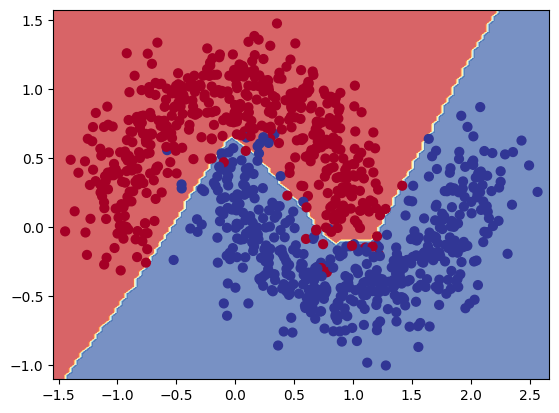

In [216]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_1, X, y)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [88]:
# Create a straight line tensor
z = torch.rand(100)

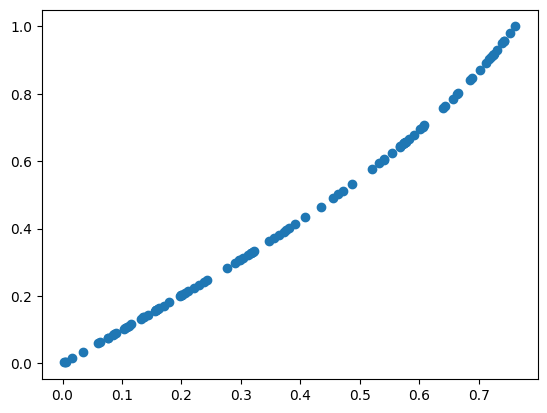

In [89]:
# Test torch.tanh() on the tensor and plot it
a = torch.tanh(z)
plt.scatter(a,z)

/tmp/ipython-input-2176148186.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return ((np.exp(x) - np.exp(-z))/(np.exp(z)+np.exp(-z)))


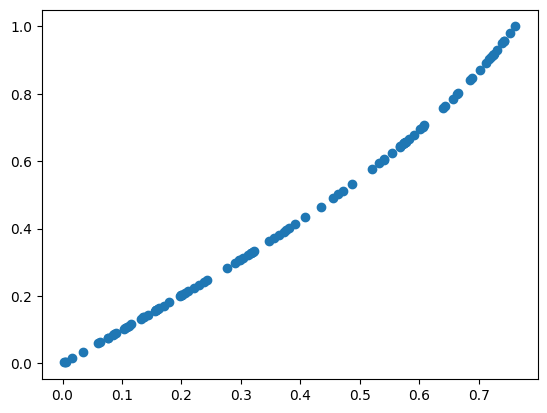

In [90]:
# Replicate torch.tanh() and plot it
import numpy as np
def tanh(x):
  return ((np.exp(x) - np.exp(-z))/(np.exp(z)+np.exp(-z)))

b = tanh(z)
plt.scatter(a,z)

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

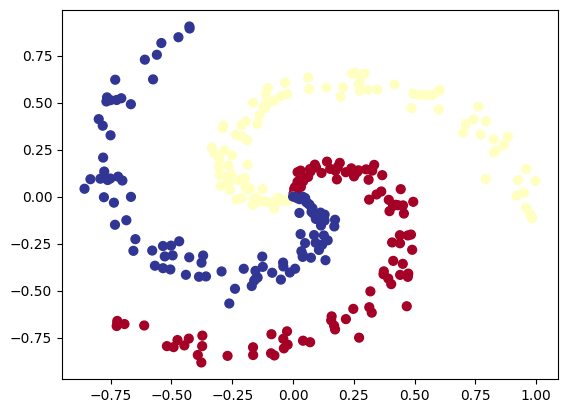

In [172]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [173]:
import torch
X = torch.from_numpy(X).type(torch.float32) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels as LongTensor for CrossEntropyLoss

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = RANDOM_SEED
)

In [174]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=K).to(device) # num_classes should be K (3)
acc_fn

MulticlassAccuracy()

In [179]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class ModelSpiralV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=D, out_features=16) # D (2) in_features
    self.layer2 = nn.Linear(in_features =16, out_features = 16)
    self.layer3 = nn.Linear(in_features=16, out_features = K) # K (3) out_features for 3 classes
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))) # Output logits directly

# Instantiate model and send it to device
model0 = ModelSpiralV0().to(device)
model0

ModelSpiralV0(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=3, bias=True)
  (relu): ReLU()
)

In [180]:
# Setup data to be device agnostic
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)


# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
y_logits = model0(X_train)[:10]
print(y_logits, "\n")
print("Prediction probabilities (softmax):")
## Your code here ##
pred_prob = torch.softmax(y_logits, dim=1) # Use softmax for multi-class probabilities
print(pred_prob, "\n")
print("Prediction labels:")
## Your code here ##
pred_labels = pred_prob.argmax(dim=1) # Get the class with the highest probability
print(pred_labels, "\n")

Logits:
tensor([[0.1555, 0.1773, 0.1948],
        [0.1781, 0.1876, 0.2145],
        [0.1260, 0.1810, 0.1767],
        [0.1240, 0.1746, 0.1841],
        [0.0894, 0.1741, 0.1706],
        [0.1374, 0.1771, 0.1807],
        [0.1296, 0.1789, 0.1781],
        [0.1060, 0.1899, 0.1750],
        [0.1761, 0.1862, 0.2080],
        [0.1224, 0.1741, 0.1834]], device='cuda:0', grad_fn=<SliceBackward0>) 

Prediction probabilities (softmax):
tensor([[0.3266, 0.3338, 0.3397],
        [0.3282, 0.3314, 0.3404],
        [0.3217, 0.3399, 0.3384],
        [0.3212, 0.3378, 0.3410],
        [0.3152, 0.3430, 0.3418],
        [0.3242, 0.3373, 0.3385],
        [0.3226, 0.3389, 0.3386],
        [0.3166, 0.3443, 0.3392],
        [0.3287, 0.3320, 0.3393],
        [0.3209, 0.3380, 0.3411]], device='cuda:0', grad_fn=<SoftmaxBackward0>) 

Prediction labels:
tensor([2, 2, 1, 2, 1, 2, 1, 1, 2, 2], device='cuda:0') 



In [181]:
# Setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss() # Change to CrossEntropyLoss for multi-class
optimizer = torch.optim.SGD(params = model0.parameters(), lr=0.1)

In [183]:
# Build a training loop for the model
epochs = 1200

# Loop over data

for epoch in range(epochs):
  ## Training
  model0.train()
  # 1. Forward pass
  logits = model0(X_train)
  pred_labels = logits.argmax(dim=1) # Get prediction labels from logits
  # 2. Calculate the loss
  loss = loss_fn(logits, y_train) # Pass logits and LongTensor labels to CrossEntropyLoss
  acc = acc_fn(pred_labels, y_train) # Pass predicted and true labels to accuracy function
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()
  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model0(X_test)
    test_labels = test_logits.argmax(dim=1) # Get prediction labels from test logits
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test) # Pass test logits and LongTensor labels
    test_acc = acc_fn(test_labels, y_test)

  # Print out what's happening every 100 epochs
  if epoch%100 == 0:
    print(f"Training loss: {loss:.4f}, Training accuracy: {acc:.2f} , testing loss:{test_loss:.4f}, testing accuracy:{test_acc:.2f}")

Training loss: 0.2323, Training accuracy: 0.93 , testing loss:0.2253, testing accuracy:0.95
Training loss: 0.1906, Training accuracy: 0.96 , testing loss:0.1748, testing accuracy:0.98
Training loss: 0.1592, Training accuracy: 0.97 , testing loss:0.1381, testing accuracy:0.98
Training loss: 0.1361, Training accuracy: 0.97 , testing loss:0.1121, testing accuracy:1.00
Training loss: 0.1189, Training accuracy: 0.98 , testing loss:0.0933, testing accuracy:1.00
Training loss: 0.1054, Training accuracy: 0.98 , testing loss:0.0789, testing accuracy:1.00
Training loss: 0.0949, Training accuracy: 0.98 , testing loss:0.0673, testing accuracy:1.00
Training loss: 0.0866, Training accuracy: 0.98 , testing loss:0.0586, testing accuracy:1.00
Training loss: 0.0800, Training accuracy: 0.99 , testing loss:0.0516, testing accuracy:1.00
Training loss: 0.0747, Training accuracy: 0.99 , testing loss:0.0460, testing accuracy:1.00
Training loss: 0.0703, Training accuracy: 0.99 , testing loss:0.0413, testing ac

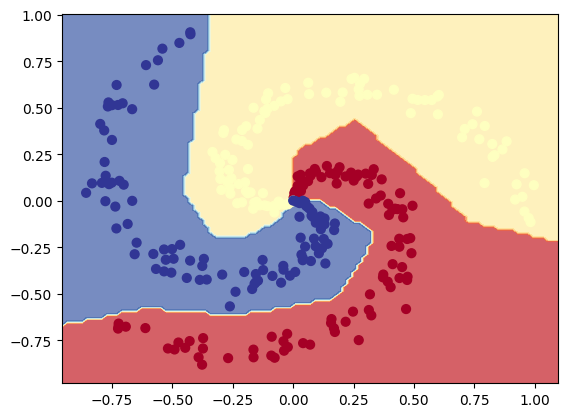

In [184]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model0, X,y) # Use model0 for the spiral data